In [ ]:
#This program helps detect potential parkinson patient

In [1]:
#import the libraries
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
#load the dataset if you are using google colaboratory
from google.colab import files
uploaded = files.upload()


Saving parkinsons.data.csv to parkinsons.data.csv


In [6]:
#Load the data into a dataframe
df = pd.read_csv('parkinsons.data.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
#check the data for missing values
df.isnull().values.any()

False

In [8]:
#Get the number of rows and columns of the dataset
df.shape

(195, 24)

In [10]:
#Get the number of who has the disease and those who don't
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
percent_has_disease = 147 /(147 + 48) * 100
percent_dont_have_disease = 48 /(147 + 48) * 100

print('if  I guess the individual did not have Parkinsons disease, I would be correct ', percent_dont_have_disease, '% of the time.')
print('if  I guess the individual has Parkinsons disease, I would be correct ', percent_has_disease, '% of the time.')

if  I guess the individual did not have Parkinsons disease, I would be correct  24.615384615384617 % of the time.
if  I guess the individual has Parkinsons disease, I would be correct  75.38461538461539 % of the time.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


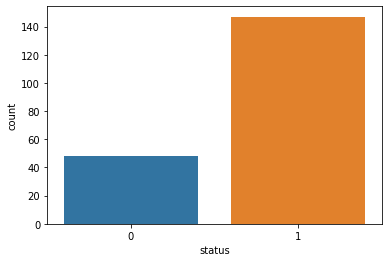

In [12]:
#Visualize the count
sns.countplot(df['status'])

In [13]:
#Get the datatypes
df.dtypes


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [18]:
#Create the feature dataset
X = df.drop(['name'], 1)
X = np.array(X.drop(['status'] , 1))

#Create the target dataset
y = np.array(df['status'])

In [19]:
#Split the data into 80% training and 20% testing testing dataset
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

In [20]:
#Transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range = (0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#Create the XGBClassifier
model = XGBClassifier().fit(x_train, y_train)

In [22]:
#Get the model predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [23]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [24]:
#Get the model accuracy, precision, recall and F1 score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.89      0.96      0.92        25

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39

